In [1]:
import os
import tensorflow as tf
import numpy as np
import platform
import pathlib
import h5py
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from nets import mobilenet_v2 as mobilenet

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.5
Tensorflow version: 2.5.0
Keras version: 2.5.0


In [2]:
workspace_path = os.environ["WORKSPACE"] if "WORKSPACE" in os.environ else "/Users/watcharinsarachai/Documents/"
experiment_path = os.path.join(workspace_path, "_trained_models", "orchids2019", "mobilenet_v2_140_stn_v15_orchids52_0002", "experiments", "experiments-branches.h5")
experiment_path

'/Users/watcharinsarachai/Documents/_trained_models/orchids2019/mobilenet_v2_140_stn_v15_orchids52_0002/experiments/experiments-branches.h5'

In [6]:
f = h5py.File(experiment_path, 'r')
dset = f['orchids52/experiments/test/logits']
dset

<HDF5 dataset "logits": shape (739, 3, 53), type "<f4">

In [44]:
m = {}
for _d in dset:
    for i, _sd in enumerate(_d):
        d = _sd[:52]
        d = d - d.min()
        k = str(_sd[52])
        kk = str(i)
        if k not in m:
            m.update({k: {kk: [d]}})
        else:
            sm = m.get(k)
            if kk not in sm:
                sm.update({kk: [d]})
            else:
                arr = sm.get(kk)
                arr.append(d)

In [82]:
std = []
for k, v in m.items():
    _std = []
    for kk, vv in v.items():
        l = len(vv)
        d = np.sum(vv, axis=0)/l
        norm = np.linalg.norm(d)
        nd = d/norm
        _std.append(nd)
    std.append(_std)
std = np.asarray(std)
std.shape

(52, 3, 52)

In [92]:
mm = []
for d in std:
    sm = []
    for dd in d:
        _d = {
            'mean': dd.mean(),
            'std': dd.std(),
            'min': dd.min(),
            'max': dd.max()
        }
        sm.append(_d)
    mm.append(sm)

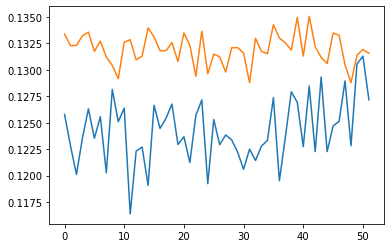

In [110]:
mean0 = []
mean1 = []
mean2 = []
for m in mm:
    mean0.append(m[0]['mean'])
    mean1.append(m[1]['mean'])
    mean2.append(m[2]['mean'])
x = np.arange(0, 52)
plt.plot(x, mean0)
plt.plot(x, mean1)

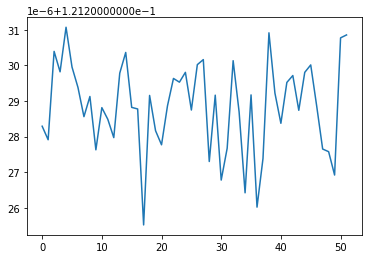

In [107]:
plt.plot(x, mean2)

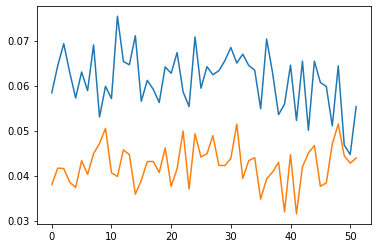

In [108]:
std0 = []
std1 = []
std2 = []
for m in mm:
    std0.append(m[0]['std'])
    std1.append(m[1]['std'])
    std2.append(m[2]['std'])
plt.plot(x, std0)
plt.plot(x, std1)

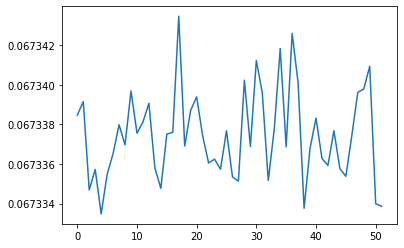

In [109]:
plt.plot(x, std2)